In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Set the main directory path for the dataset
dataset_dir = "/kaggle/input/dataset-juntado/dataset_JUNTADO/train"

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Set validation split
)

# Train and validation generators
train_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Specify as training data
)

val_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify as validation data
)

# Model definition
base_model = DenseNet201(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x=Dense(512,activation="relu")(x)
x=Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=val_generator
)
model.save("densenet201_non11.h5")

# Plotting training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluation and metrics
val_predictions = model.predict(val_generator)
val_predictions = np.round(val_predictions).flatten()
val_true_labels = val_generator.classes
f1 = f1_score(val_true_labels, val_predictions)
tn, fp, fn, tp = confusion_matrix(val_true_labels, val_predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("F1 Score:", f1)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluation and metrics
val_predictions = model.predict(val_generator)
val_predictions = np.round(val_predictions).flatten()
val_true_labels = val_generator.classes
f1 = f1_score(val_true_labels, val_predictions)
tn, fp, fn, tp = confusion_matrix(val_true_labels, val_predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("F1 Score:", f1)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


In [ ]:
model_path="/kaggle/input/densenet201-gen/densenet201_gen11.h5"
test="/kaggle/input/dataset-juntado/dataset_JUNTADO/test"

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the saved model
model_path = "/kaggle/input/densenet201-gen/densenet201_gen11.h5"
model = load_model(model_path)

# Path to the test dataset
test_folder = "/kaggle/input/dataset-juntado/dataset_JUNTADO/test"

# Data generator for test dataset
test_datagen = ImageDataGenerator(rescale=1./255)  # Assuming no augmentation is needed for test data

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Adjust if it's not binary classification
    shuffle=False  # Ensure predictions are aligned with ground truth labels
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Make predictions on the test data
test_predictions = model.predict(test_generator)
test_predictions = np.round(test_predictions).flatten()

# Get true labels for the test data
test_true_labels = test_generator.classes

# Calculate F1 score, confusion matrix, and classification report
f1 = f1_score(test_true_labels, test_predictions)
conf_matrix = confusion_matrix(test_true_labels, test_predictions)
class_report = classification_report(test_true_labels, test_predictions)

# Output the evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


2024-04-10 17:35:14.108667: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 17:35:14.108778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 17:35:14.407459: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 4580 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/144 ━━━━━━━━━━━━━━━━━━━━ 1:44:50 44s/step - accuracy: 0.3125 - loss: 0.8416

I0000 00:00:1712770589.258557      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712770589.355919      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


144/144 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.5434 - loss: 0.7139


W0000 00:00:1712770762.127262      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  2/144 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step 

W0000 00:00:1712770780.840513      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 51/144 ━━━━━━━━━━━━━━━━━━━━ 1:06 711ms/step

KeyboardInterrupt: 

Found 4580 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/144 ━━━━━━━━━━━━━━━━━━━━ 45:22 19s/step - accuracy: 0.3125 - loss: 0.8416

W0000 00:00:1712770886.173661      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


144/144 ━━━━━━━━━━━━━━━━━━━━ 126s 746ms/step - accuracy: 0.5434 - loss: 0.7139


W0000 00:00:1712770992.927287      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  2/144 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step 

W0000 00:00:1712771009.003604      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


144/144 ━━━━━━━━━━━━━━━━━━━━ 121s 740ms/step


W0000 00:00:1712771114.805512      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.6325706839561462
Test Accuracy: 0.6412663459777832
F1 Score: 0.6761285235560813
Confusion Matrix:
[[1222 1143]
 [ 500 1715]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.52      0.60      2365
           1       0.60      0.77      0.68      2215

    accuracy                           0.64      4580
   macro avg       0.65      0.65      0.64      4580
weighted avg       0.66      0.64      0.64      4580



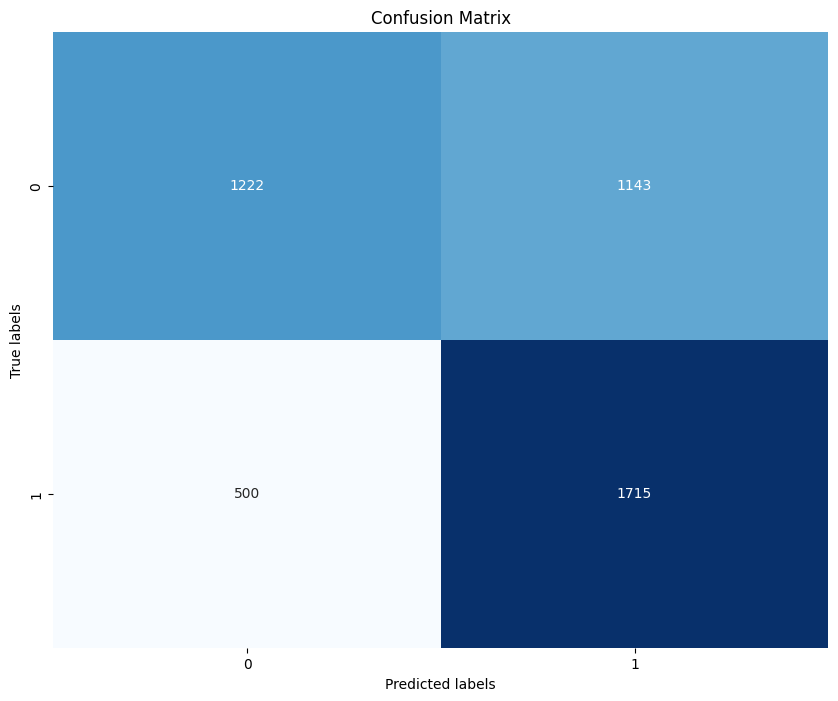

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model
model_path = "/kaggle/input/densenet201-gen/densenet201_gen11.h5"
model = load_model(model_path)

# Path to the test dataset
test_folder = "/kaggle/input/dataset-juntado/dataset_JUNTADO/test"

# Data generator for test dataset
test_datagen = ImageDataGenerator(rescale=1./255)  # Assuming no augmentation is needed for test data

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Adjust if it's not binary classification
    shuffle=False  # Ensure predictions are aligned with ground truth labels
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Make predictions on the test data
test_predictions = model.predict(test_generator)
test_predictions = np.round(test_predictions).flatten()

# Get true labels for the test data
test_true_labels = test_generator.classes

# Calculate F1 score, confusion matrix, and classification report
f1 = f1_score(test_true_labels, test_predictions)
conf_matrix = confusion_matrix(test_true_labels, test_predictions)
class_report = classification_report(test_true_labels, test_predictions)

# Output the evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix as an image
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [2]:


import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from keras.models import Model
from keras import optimizers, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input



Found 15684 images belonging to 2 classes.
Found 3920 images belonging to 2 classes.


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 26,211,201 (99.99 MB)

 Trainable params: 2,623,489 (10.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
  1/491 ━━━━━━━━━━━━━━━━━━━━ 2:47:36 21s/step - accuracy: 0.4062 - loss: 0.9765

W0000 00:00:1712261607.303526     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.5096 - loss: 0.7860

W0000 00:00:1712261993.952408     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


491/491 ━━━━━━━━━━━━━━━━━━━━ 534s 1s/step - accuracy: 0.5096 - loss: 0.7858 - val_accuracy: 0.5375 - val_loss: 0.6902
Epoch 2/10


W0000 00:00:1712262120.858788     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


491/491 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 0.5243 - loss: 0.6946 - val_accuracy: 0.5375 - val_loss: 0.6914
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.5274 - loss: 0.6926 - val_accuracy: 0.5375 - val_loss: 0.6903
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 514s 1s/step - accuracy: 0.5278 - loss: 0.6928 - val_accuracy: 0.5375 - val_loss: 0.6918
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 513s 1s/step - accuracy: 0.5338 - loss: 0.6937 - val_accuracy: 0.5375 - val_loss: 0.6903
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 509s 1s/step - accuracy: 0.5291 - loss: 0.6926 - val_accuracy: 0.5375 - val_loss: 0.6911
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 509s 1s/step - accuracy: 0.5259 - loss: 0.6926 - val_accuracy: 0.5375 - val_loss: 0.6905
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - accuracy: 0.5390 - loss: 0.6914 - val_accuracy: 0.5375 - val_loss: 0.6903
Epoch 9/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - accuracy: 0.5352 - loss: 0.6918 - val_accuracy: 0.537

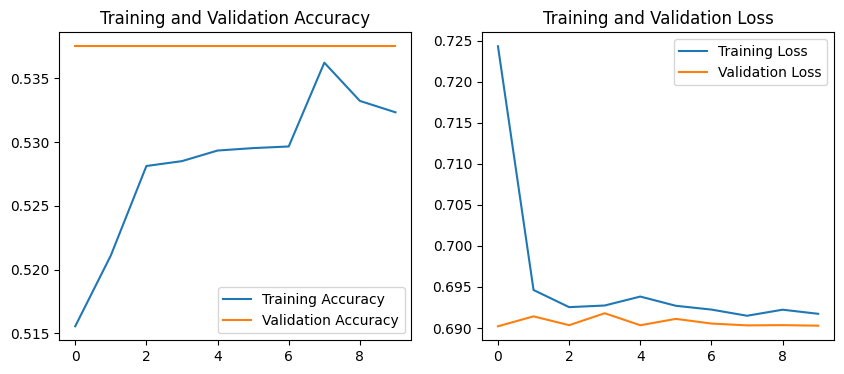

  2/123 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step

W0000 00:00:1712266716.761258     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


123/123 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step


W0000 00:00:1712266852.645835     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


NameError: name 'f1_score' is not defined

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Set the main directory path for the dataset
dataset_dir = "/kaggle/input/dataset-juntado/dataset_JUNTADO/train"

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Set validation split
)

# Train and validation generators
train_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Specify as training data
)

val_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify as validation data
)

# Model definition
input_shape=(224,224,3)
input_tensor=Input(shape=input_shape)
base_model = ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x=Dropout(0.5)(x)
x = Dense(1024 ,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(512,activation="relu")(x)
x=Dropout(0.3)(x)

predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
    
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
callback_list=[rlrop]
optimizer=optimizers.Adam(learning_rate=1e-4)    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Training the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=val_generator
)
model.save("densenet201_new.h5")

# Plotting training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluation and metrics
val_predictions = model.predict(val_generator)
val_predictions = np.round(val_predictions).flatten()
val_true_labels = val_generator.classes
f1 = f1_score(val_true_labels, val_predictions)
tn, fp, fn, tp = confusion_matrix(val_true_labels, val_predictions).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("F1 Score:", f1)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


Found 4580 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/144 ━━━━━━━━━━━━━━━━━━━━ 1:17:05 32s/step - accuracy: 0.7500 - loss: 0.6367

W0000 00:00:1712774926.623490      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


144/144 ━━━━━━━━━━━━━━━━━━━━ 131s 689ms/step - accuracy: 0.6531 - loss: 0.6348
  1/144 ━━━━━━━━━━━━━━━━━━━━ 3:59 2s/step

W0000 00:00:1712775027.913507      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


144/144 ━━━━━━━━━━━━━━━━━━━━ 92s 634ms/step
Test Loss: 0.6620627641677856
Test Accuracy: 0.6098253130912781
F1 Score: 0.5538077403245942
Confusion Matrix:
[[1684  681]
 [1106 1109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      2365
           1       0.62      0.50      0.55      2215

    accuracy                           0.61      4580
   macro avg       0.61      0.61      0.60      4580
weighted avg       0.61      0.61      0.61      4580



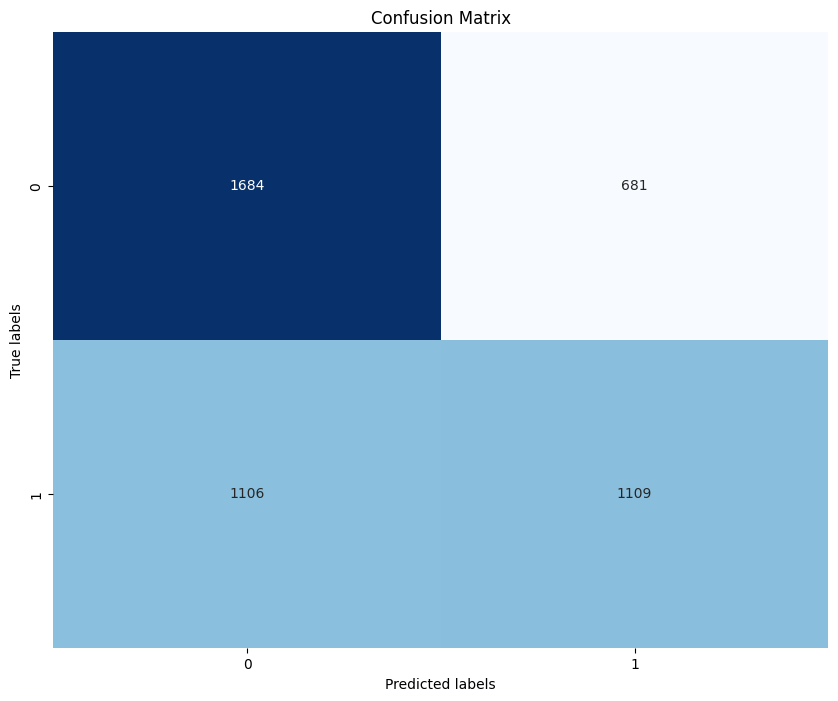

In [4]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model
model_path = "/kaggle/input/vgg-16-gen/vgg16_model_gen.h5"
model = load_model(model_path)

# Path to the test dataset
test_folder = "/kaggle/input/dataset-juntado/dataset_JUNTADO/test"

# Data generator for test dataset
test_datagen = ImageDataGenerator(rescale=1./255)  # Assuming no augmentation is needed for test data

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Adjust if it's not binary classification
    shuffle=False  # Ensure predictions are aligned with ground truth labels
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Make predictions on the test data
test_predictions = model.predict(test_generator)
test_predictions = np.round(test_predictions).flatten()

# Get true labels for the test data
test_true_labels = test_generator.classes

# Calculate F1 score, confusion matrix, and classification report
f1 = f1_score(test_true_labels, test_predictions)
conf_matrix = confusion_matrix(test_true_labels, test_predictions)
class_report = classification_report(test_true_labels, test_predictions)

# Output the evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix as an image
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
